In [ ]:
softmax

In [1]:
import pandas as pd

In [4]:
import seaborn as sns

['Setosa' 'Versicolor' 'Virginica']


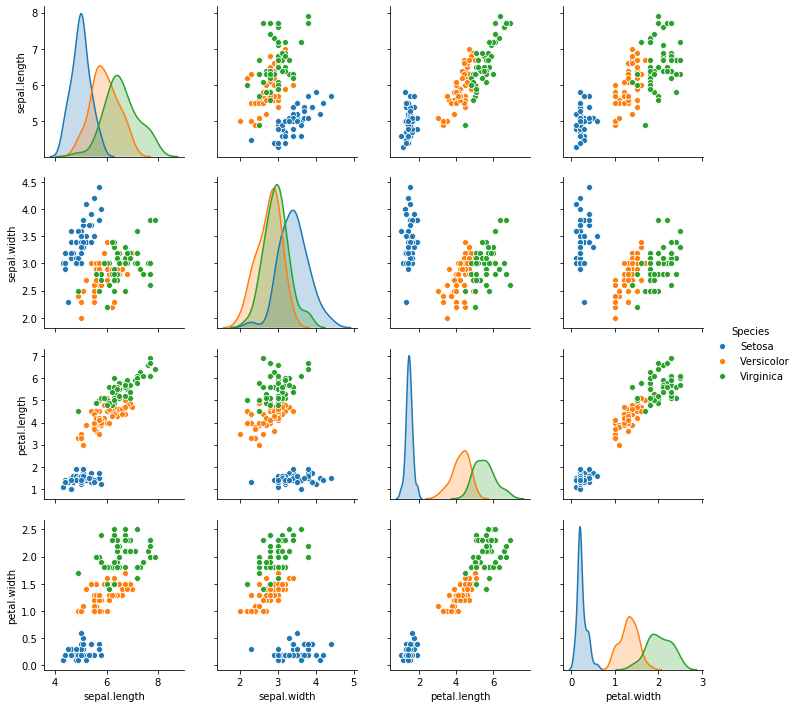

In [6]:
data=pd.read_csv("/Users/user/Downloads/iris.csv")
len(data)
data[:5]
print(data['Species'].unique())
sns.pairplot(data,hue='Species') # 데이터 피쳐별로 스캐터플롯으로 산점도로 출력해준다

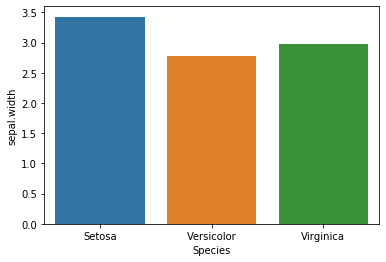

In [7]:
sns.barplot(data['Species'],data['sepal.width'],ci=None)

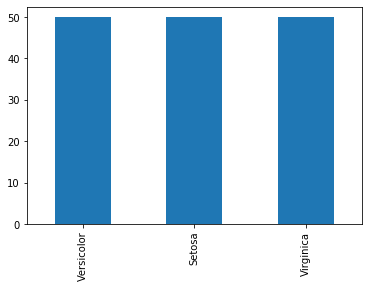

In [9]:
import matplotlib.pylab as plt
data['Species'].value_counts().plot(kind='bar') # 데이터의 구성(종별 갯수 비율 비교)

In [ ]:
# Species가 문자열로 되어있는데, replace를 통해 숫자로 변환해줄 수 있다

In [24]:
data['Species']=data['Species'].replace(['Setosa','Versicolor','Virginica'],[0,1,2])

In [11]:
data['Species'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: Species, dtype: int64

In [25]:
data.info()
# dataframe 구조에서 밸류만 뽑아서 어레이로 저장하기 위해 .values 넣어줌
datax=data[['sepal.length','sepal.width','petal.length','petal.width']].values 
datay=data['Species'].values
print(datax[:5])
print(datay[:5])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [16]:
from sklearn.model_selection import train_test_split

In [26]:
(xtrain,xtest,ytrain,ytest)=train_test_split(datax,datay,train_size=0.8,random_state=1)

In [27]:
from keras.utils import np_utils
ytrain=np_utils.to_categorical(ytrain)
ytest=np_utils.to_categorical(ytest)
print(ytrain[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [19]:
## 소프트맥스 회귀
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [28]:
model=Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))
sgd=optimizers.SGD(lr=0.01) #학습률 설정
#다중분류에선 카테고리컬크로스엔트로피를 사용/ 이중분류에서는 크로스엔트로피
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
history=model.fit(xtrain,ytrain,batch_size=1,epochs=200,validation_data=(xtest,ytest))

W0814 09:56:54.538823 15728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 09:56:54.579823 15728 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 3ms/step - loss: 6.7033 - acc: 0.3250 - val_loss: 4.7005 - val_acc: 0.3667
Epoch 2/200
120/120 [==============================] - 0s 850us/step - loss: 4.8995 - acc: 0.3250 - val_loss: 3.1242 - val_acc: 0.3667
Epoch 3/200
120/120 [==============================] - 0s 767us/step - loss: 3.3658 - acc: 0.3250 - val_loss: 2.0716 - val_acc: 0.3667
Epoch 4/200
120/120 [==============================] - 0s 758us/step - loss: 2.3681 - acc: 0.3167 - val_loss: 1.5546 - val_acc: 0.2000
Epoch 5/200
120/120 [==============================] - 0s 733us/step - loss: 1.7118 - acc: 0.1583 - val_loss: 1.2648 - val_acc: 0.0333
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 1.3007 - acc: 0.2000 - val_loss: 1.1806 - val_acc: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 750us/step - loss: 1.1227 - acc: 0.3000 - val_loss: 1.1743 - val_acc: 0.2333
Epoch 8/200
12

Epoch 61/200
120/120 [==============================] - 0s 783us/step - loss: 0.3663 - acc: 0.9083 - val_loss: 0.4558 - val_acc: 0.7333
Epoch 62/200
120/120 [==============================] - 0s 733us/step - loss: 0.3618 - acc: 0.9000 - val_loss: 0.4307 - val_acc: 0.8333
Epoch 63/200
120/120 [==============================] - 0s 700us/step - loss: 0.3599 - acc: 0.9167 - val_loss: 0.4430 - val_acc: 0.7333
Epoch 64/200
120/120 [==============================] - 0s 708us/step - loss: 0.3562 - acc: 0.9083 - val_loss: 0.4338 - val_acc: 0.7667
Epoch 65/200
120/120 [==============================] - 0s 708us/step - loss: 0.3534 - acc: 0.9167 - val_loss: 0.4483 - val_acc: 0.7333
Epoch 66/200
120/120 [==============================] - 0s 725us/step - loss: 0.3506 - acc: 0.9083 - val_loss: 0.4353 - val_acc: 0.7333
Epoch 67/200
120/120 [==============================] - 0s 700us/step - loss: 0.3494 - acc: 0.9083 - val_loss: 0.4207 - val_acc: 0.8333
Epoch 68/200
120/120 [==========================

Epoch 121/200
120/120 [==============================] - 0s 783us/step - loss: 0.2364 - acc: 0.9750 - val_loss: 0.3149 - val_acc: 0.9333
Epoch 122/200
120/120 [==============================] - 0s 708us/step - loss: 0.2351 - acc: 0.9750 - val_loss: 0.3118 - val_acc: 0.9333
Epoch 123/200
120/120 [==============================] - 0s 692us/step - loss: 0.2342 - acc: 0.9750 - val_loss: 0.3112 - val_acc: 0.9333
Epoch 124/200
120/120 [==============================] - 0s 717us/step - loss: 0.2322 - acc: 0.9500 - val_loss: 0.2927 - val_acc: 0.9333
Epoch 125/200
120/120 [==============================] - 0s 725us/step - loss: 0.2317 - acc: 0.9750 - val_loss: 0.3028 - val_acc: 0.9333
Epoch 126/200
120/120 [==============================] - 0s 692us/step - loss: 0.2294 - acc: 0.9667 - val_loss: 0.2965 - val_acc: 0.9333
Epoch 127/200
120/120 [==============================] - 0s 733us/step - loss: 0.2280 - acc: 0.9750 - val_loss: 0.2989 - val_acc: 0.9333
Epoch 128/200
120/120 [==================

Epoch 181/200
120/120 [==============================] - 0s 742us/step - loss: 0.1764 - acc: 0.9833 - val_loss: 0.2344 - val_acc: 0.9333
Epoch 182/200
120/120 [==============================] - 0s 725us/step - loss: 0.1746 - acc: 0.9833 - val_loss: 0.2326 - val_acc: 0.9333
Epoch 183/200
120/120 [==============================] - 0s 758us/step - loss: 0.1725 - acc: 0.9833 - val_loss: 0.2338 - val_acc: 0.9333
Epoch 184/200
120/120 [==============================] - 0s 925us/step - loss: 0.1734 - acc: 0.9750 - val_loss: 0.2375 - val_acc: 0.9333
Epoch 185/200
120/120 [==============================] - 0s 708us/step - loss: 0.1731 - acc: 0.9750 - val_loss: 0.2335 - val_acc: 0.9333
Epoch 186/200
120/120 [==============================] - 0s 700us/step - loss: 0.1725 - acc: 0.9833 - val_loss: 0.2307 - val_acc: 0.9333
Epoch 187/200
120/120 [==============================] - 0s 725us/step - loss: 0.1707 - acc: 0.9833 - val_loss: 0.2266 - val_acc: 0.9333
Epoch 188/200
120/120 [==================

In [32]:
# train,test 데이터의 정확도와 같은 요소를 따로 저장해줄 수 있다
history.history['acc']
history.history['loss']

[6.703304798722578,
 4.899515388254076,
 3.3658000989506642,
 2.368071028093497,
 1.7117935582995414,
 1.3006732687354088,
 1.1227058897415796,
 1.0586639121174812,
 1.0154414469997088,
 0.9757778686781724,
 0.9366383463144302,
 0.904314061999321,
 0.8711640606323878,
 0.839267208178838,
 0.8083437574406465,
 0.7828189464906852,
 0.7562074365715186,
 0.7312447816133499,
 0.7103363557408253,
 0.6889094971120358,
 0.6699811468521754,
 0.6538230332235495,
 0.6353894765178363,
 0.6208449275543292,
 0.6070929894844691,
 0.5915295612066984,
 0.578329274058342,
 0.5667050547897816,
 0.5538761977106332,
 0.5455574810504913,
 0.5327170636504889,
 0.5237830683588982,
 0.5166053344806035,
 0.5064441091691454,
 0.49947229648629826,
 0.4901487256710728,
 0.48290080049385625,
 0.476776451865832,
 0.47006794065237045,
 0.4631185369566083,
 0.4567599126448234,
 0.4529184576123953,
 0.4442715208977461,
 0.43985163923352955,
 0.4357015067711473,
 0.43012279622877636,
 0.42165990623955923,
 0.41818103957

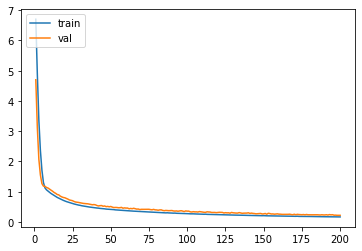

In [36]:
epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs,history.history['loss'])

plt.plot(epochs,history.history['val_loss'])
plt.legend(['train','val'],loc='upper left')
plt.show()

In [37]:
print("테스트 정확도:%0.4f" % (model.evaluate(xtest,ytest)[1])) # 1번 인덱스는 정확도를 출력

30/30 [==============================] - 0s 600us/step
테스트 정확도:0.9333


In [ ]:
model=Sequential()
# init= uniform은 난수가 균등하게 추가되는 옵션
model.add(Dense(8,input_dim=4,activation='relu',init='uniform')) #4*8
# X=1*4, W=4*8, b=8 --> 출력Y가 8개 나온다. 
model.add(Dense(8,activation='relu')) # 두번째 Dense 부터는 입력층을 안써줘도 되는데 8*8
# X=1*8, W=8*8, b=8 --> 출력Y가 8개 나온다. 
model.add(Dense(3,activation='softmax'))
# X=1*8, W=8*3, b=3 --> 출력Y가 3개 나온다. 



In [ ]:
손실함수 MSE / CE(CrossEntropy)

In [38]:
# Batch gradient descent(batch경사 하강법) 
: optimizer에서 loss를 전체데이터를 고려해서 배치하는 것
    --> 1 에폭에 모든 매개변수 업데이트를 한 번 수행
model.fit(xtrain,ytrain,batch_size=len(trainx)) 

# Mini batch --> batch 사이즈를 적게 주어 계산을 빠르게 수행
model.fit(xtrain,ytrain,batch_size=16) 

# SGD(확률적 경사 하강법)
model.fit(xtrain,ytrain,batch_size=1)

# Momentum --> 접선의 기울기만큼 반영하여 local minimum을 넘어가도록 관성의 힘을 적용하여 일부 해결
keras.optimizers.SGD(lr=0.01,momentum=0.9)



Epoch 1/1
120/120 [==============================] - 0s 850us/step - loss: 0.1617 - acc: 0.9833


In [ ]:
epoch
:전체 data에 대해서 순전파/ 역전파가 학습이 이뤄지는 단위
    
    학습:순전파(채점) 역전파(반성)
        
1000문제 100개 단위(에폭)로 채점 --> 배치 크기(batch_size):100
    1000/100=10 : 배치 수=가중치 업데이트 횟수 (iteration)
        
SGD는 한 문제 풀고 한 문제 채점(배치 크기 1이므로)

과적합: 훈련 데이터가 적을 때 / 매개변수는 많을 때 발생
    과적합을 방지하려면--> 1)훈련을 조기 종료시킨다.
                           2)드롭아웃 옵션을 줘서 모든 노드를 학습시키지 않고, 
                            특정 뉴런에 의존적이지 않도록 즉 편향적이지 않도록 만들어진다.
                            3) 표준화 정규화 시킨다.

In [42]:
from keras.preprocessing.text import Tokenizer
t=Tokenizer()
fitText="The earth is an awesome place live"
# t.fit_on_texts([fitText]) # 알파벳 단위 
t.fit_on_texts([fitText]) # 단어 단위
print(t.word_index)

test="The earth is an great place live"
t.texts_to_sequences([test])
t.texts_to_sequences([test])[0] # 리스트 하나 벗겨줌

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


[[1, 2, 3, 4, 6, 7]]

In [ ]:
Padding : 길이를 동일하게 맞춰주는 작업 => pad_sequence()로 수행

In [46]:
from keras.preprocessing.sequence import pad_sequences
pad_sequences([[10,20,30],[40,50],[60,70,80,90]]) # 앞쪽에 0을 채워서 크기를 맞춤
pad_sequences([[10,20,30],[40,50],[60,70,80,90]],maxlen=5) # 전체 길이를 5로 맞춤
pad_sequences([[10,20,30],[40,50],[60,70,80,90]],maxlen=5,padding='post') # 뒷쪽에 0을 채움

array([[10, 20, 30,  0,  0],
       [40, 50,  0,  0,  0],
       [60, 70, 80, 90,  0]])

In [ ]:
word embedding
:단어들을 밀집벡터(dense vector)로 변환하는 것
    
n차원인 경우, 0000000100...000과 같이 하나의 피쳐를 나타내기 위해 공간낭비가 심하다
but, 밀집벡터는 차원이 낮은 상태로 표현이 가능하다.

ex)1000차원일 경우
원핫벡터의 경우
[000000000100000...000000]:희소벡터
밀집벡터의 경우
[0.1 0.5 -1.5 1.8]:4차원 실수

    
Embedding(정수로된 단어)
Embedding(단어집합 크기, 벡터의 크기, 입력단어 시퀀스 길이)
Embedding(1000,2,3)
text=[['to','you','I'],['YOU','HI','Good']...]
index     emb
0      [1.5 3.5]
1      [2.3 4.5]
...      ...
999    [5.5 2.4]


In [ ]:
Sequential :층을 구성 => model => model.add()
    Embedding도 하나의 층이다. Dense 대신에 Embedding을 써서

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit() : 실제학습시키는 함수

model.fit(xtrain,ytrain,epochs=10,batch_size=64,validation_data(xval,yval)) # validation_data으로 검증데이터도 사용할 수 있다.
model.evaluate(xtest,ytest,batch_size=32)
model.predict(xinput,batch_size=32)


# 모델 저장
model.save("my_model.h5")

# 모델 불러오기
from keras.models import load_model
model=load_model("my_model.h5")

In [51]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w= tf.Variable(tf.random_normal([1]))
b= tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
feed={x:xdata,y:ydata}

saver=tf.train.Saver()

for i in range(2001):
    sess.run(train,feed_dict=feed)
    if i%20==0:
        print(i,sess.run(cost,feed_dict=feed))
        saver.save(sess,'Model/second',global_step=i)
saver.save(sess,'Model/first')

0 0.3156866
20 0.09248463
40 0.034943167
60 0.013202481
80 0.0049882554


W0814 13:54:54.577839 15728 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


100 0.0018846948
120 0.0007120872
140 0.00026904632
160 0.00010165343
180 3.8407397e-05
200 1.451142e-05
220 5.4825687e-06
240 2.071594e-06
260 7.825808e-07
280 2.9565317e-07
300 1.1173919e-07
320 4.2214864e-08
340 1.5954376e-08
360 6.026847e-09
380 2.2789095e-09
400 8.5746404e-10
420 3.24088e-10
440 1.2329338e-10
460 4.6673183e-11
480 1.7754095e-11
500 6.915949e-12
520 2.4679518e-12
540 8.7159907e-13
560 3.2684966e-13
580 1.563194e-13
600 6.158037e-14
620 6.158037e-14
640 3.7895614e-14
660 4.7369517e-15
680 0.0
700 0.0
720 0.0
740 0.0
760 0.0
780 0.0
800 0.0
820 0.0
840 0.0
860 0.0
880 0.0
900 0.0
920 0.0
940 0.0
960 0.0
980 0.0
1000 0.0
1020 0.0
1040 0.0
1060 0.0
1080 0.0
1100 0.0
1120 0.0
1140 0.0
1160 0.0
1180 0.0
1200 0.0
1220 0.0
1240 0.0
1260 0.0
1280 0.0
1300 0.0
1320 0.0
1340 0.0
1360 0.0
1380 0.0
1400 0.0
1420 0.0
1440 0.0
1460 0.0
1480 0.0
1500 0.0
1520 0.0
1540 0.0
1560 0.0
1580 0.0
1600 0.0
1620 0.0
1640 0.0
1660 0.0
1680 0.0
1700 0.0
1720 0.0
1740 0.0
1760 0.0
1780 0.0
18

'Model/first'

In [52]:
import tensorflow as tf
xdata=[1,2,3]
ydata=[1,2,3]

x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w= tf.Variable(tf.random_normal([1]))
b= tf.Variable(tf.random_normal([1]))

hf=w*x+b
cost=tf.reduce_mean((hf-y)**2)

train=tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess=tf.Session()
# sess.run(tf.global_variables_initializer())
# feed={x:xdata,y:ydata}

saver=tf.train.Saver()
latest= tf.train.latest_checkpoint('Model') # 가장 최근의 모델을 복원해줌
print(latest)

saver.restore(sess,latest)
print(sess.run(hf,feed_dict={x:[5:7]}))
# for i in range(2001):
#     sess.run(train,feed_dict=feed)
#     if i%20==0:
#         print(i,sess.run(cost,feed_dict=feed))
#         saver.save(sess,'Model/second',global_step=i)
# saver.save(sess,'Model/first')

Model\first


In [ ]:
함수형 API 신경망 구성

In [55]:
from keras.models import Model
from keras.layers import Input,Dense
inputs=Input(shape=(10,)) # 입력 10개 
h1=Dense(64,activation='relu')(inputs)
h2=Dense(64,activation='relu')(h1)
output=Dense(64,activation='sigmoid')(h2)

model=Model(inputs=inputs, outputs=output)

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy' )